In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
import matplotlib.colors as colors
from scipy.integrate import odeint
%matplotlib inline

## Section 3.1

In [2]:
def make_plot(title='', x_label='', y_label='', z_label='', x_lim=(0, 0), y_lim=(0,0), z_lim=(0,0), 
              grid=True, size=(9, 6), dpi=115, three_d=False):
    '''
    Generates a plot object
    
    Parameters:
        title - (string) title of the plot
        x - (float) a list of values for omega/omega_0
        y - (float) a list of values for the amplitude
        xlim - (float) the limit for the x axis, this is a list containing 2 variables, 
                    the max and min value of x
        ylim - (float) the limit for the y axis, this is a list containing 2 variables, 
                    the max and min value of y
        size - (int) resizing the figure of the plot
        dpi - (int) increasing the quality of the image produced
    Returns:
        plot - (object) the plot
    '''
    fig = plt.figure(figsize=(size[0], size[1]), dpi=dpi)
    plot = fig.add_subplot(111) if not three_d else fig.add_subplot(111, projection='3d')
    
    plot.set_title(title)
    if y_lim[0] != 0 and y_lim[1] !=0: plot.set_ylim(y_lim[0], y_lim[1])
    if x_lim[0] != 0 and x_lim[1] !=0: plot.set_xlim(x_lim[0], x_lim[1])
    if z_lim[0] != 0 and z_lim[1] !=0: plot.set_zlim(z_lim[0], z_lim[1])
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    if three_d: plot.set_zlabel(z_label)
    if grid: plt.grid()
    
    return plot

In [3]:
def auto_correlation(x):
    '''
    Finds the auto correlation of a digital signal

    '''
    return [np.mean(x*np.roll(x, k)) for k in range(len(x))]

def PSD(signal=None, AC=None):
    '''
    Power spectral density function (PSD) 
    
    Fourier transform of the auto-correlation function.
    
    '''
    if (AC is None) & (signal is None):
        print("PEBCAK Error: Must input at least one of signal or AC.")
        return []
    elif AC is None:
        AC = auto_correlation(x)
    
    return np.fft.fft(AC)

In [4]:
def uniform_white_noise(mean, interval, npoints=8192):
    '''
    Function to generate uniformly distributed white noise
    '''
    return mean + np.random.uniform(-interval/2, interval/2, npoints)

def gaussian_white_noise(mean, sigma, npoints=8192):
    '''
    Function to generate gaussian white noise
    '''
    return np.random.normal(mean, sigma, npoints)

def delta(k, npoints=8192):
    signal = np.zeros(npoints)
    signal[k] += 1
    return signal

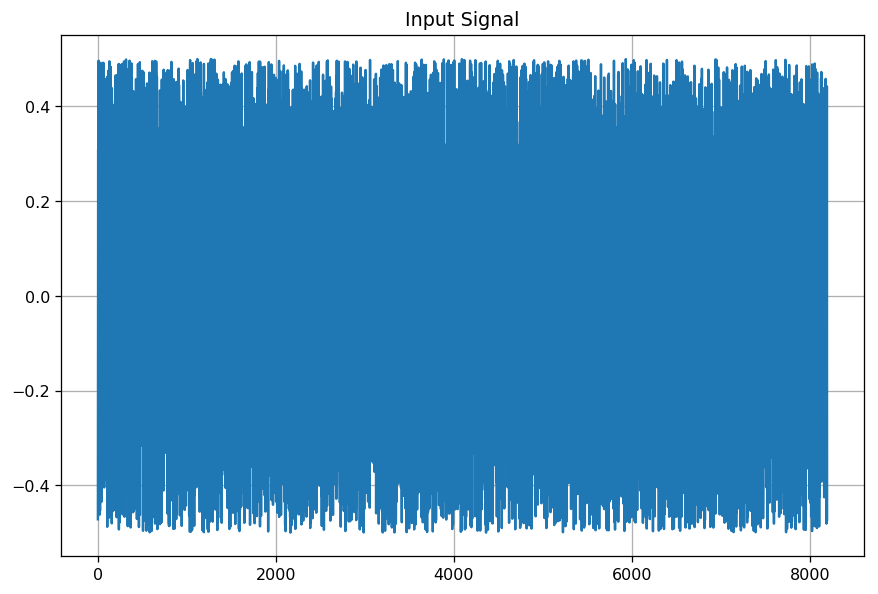

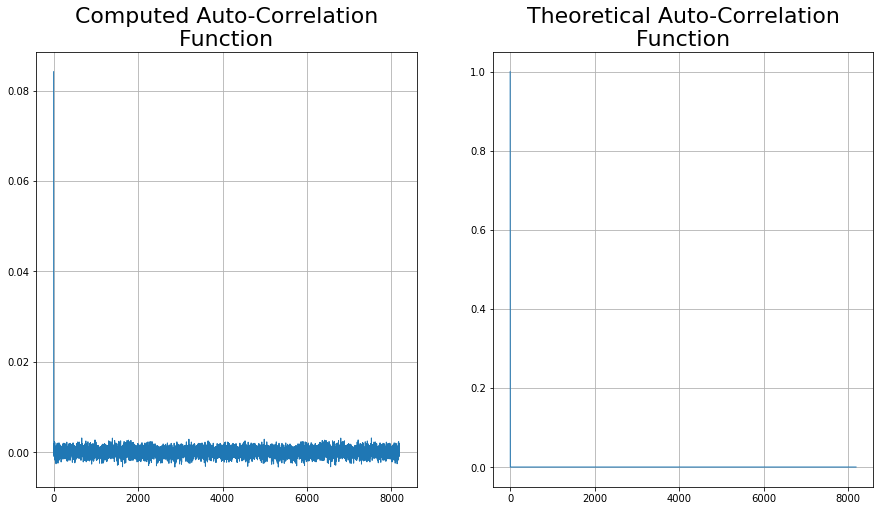

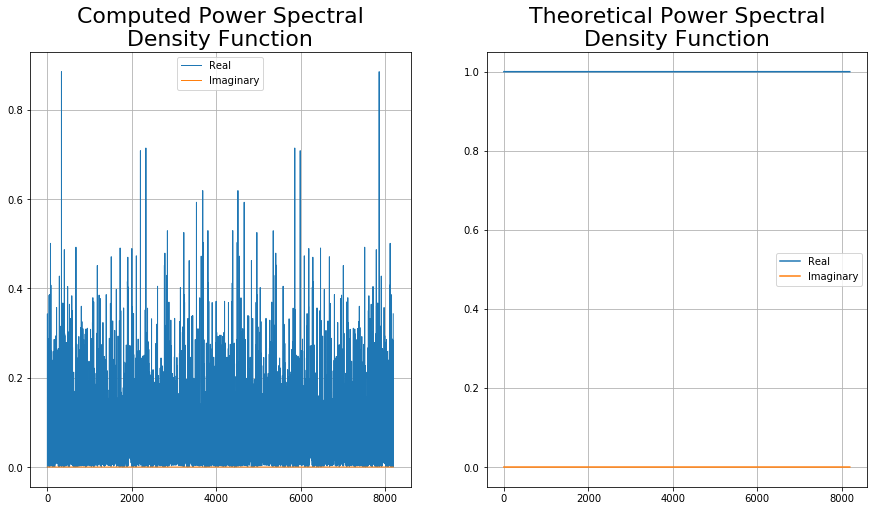

In [48]:
uniform_signal = uniform_white_noise(0, 1)
AC_u = auto_correlation(uniform_signal)
S_u = PSD(AC=AC_u)
S_u_theo = PSD(AC=delta(0))

#****************Plotting****************
font_size=22

make_plot('Input Signal').plot(uniform_signal)

# Auto-correlation function
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(AC_u, linewidth=1)
ax[0].set_title('Computed Auto-Correlation\nFunction', fontsize=font_size)
ax[0].grid('on')
ax[1].plot(delta(0), linewidth=1)
ax[1].set_title('Theoretical Auto-Correlation\nFunction', fontsize=font_size)
ax[1].grid('on')

# PSD
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(S_u.real, label="Real", linewidth=1)
ax[0].plot(S_u.imag, label="Imaginary", linewidth=1)
ax[0].set_title('Computed Power Spectral\nDensity Function', fontsize=font_size)
ax[0].grid('on')
ax[0].legend()
ax[1].plot(S_u_theo.real, label="Real")
ax[1].plot(S_u_theo.imag, label="Imaginary")
ax[1].set_title('Theoretical Power Spectral\nDensity Function', fontsize=font_size)
ax[1].grid('on')
ax[1].legend();

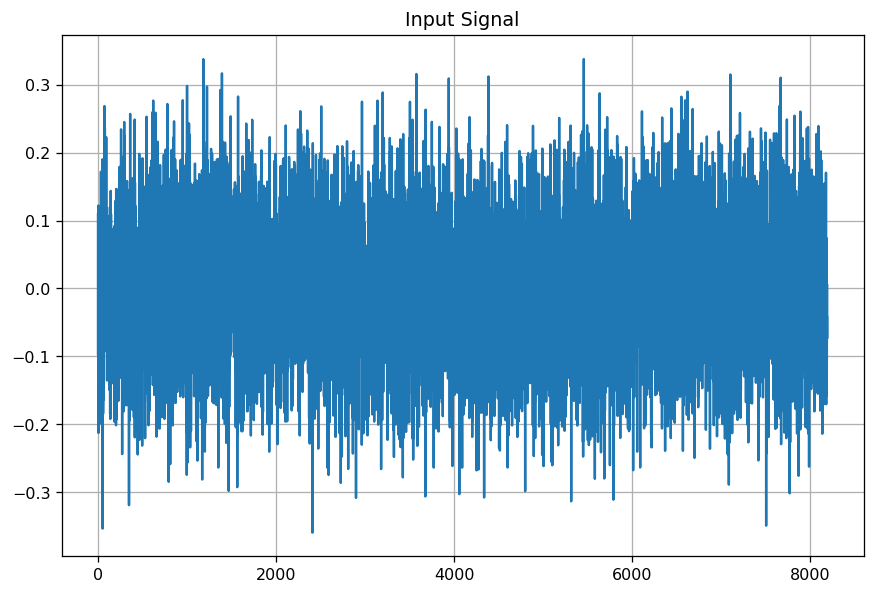

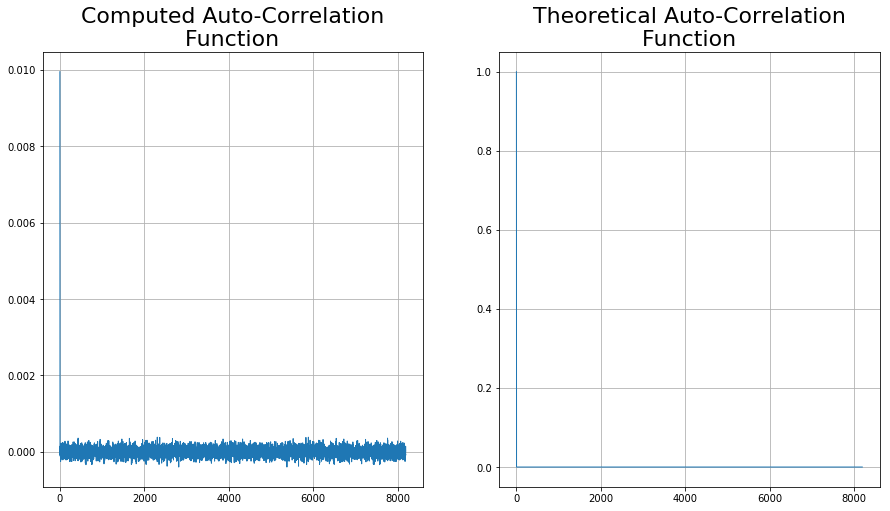

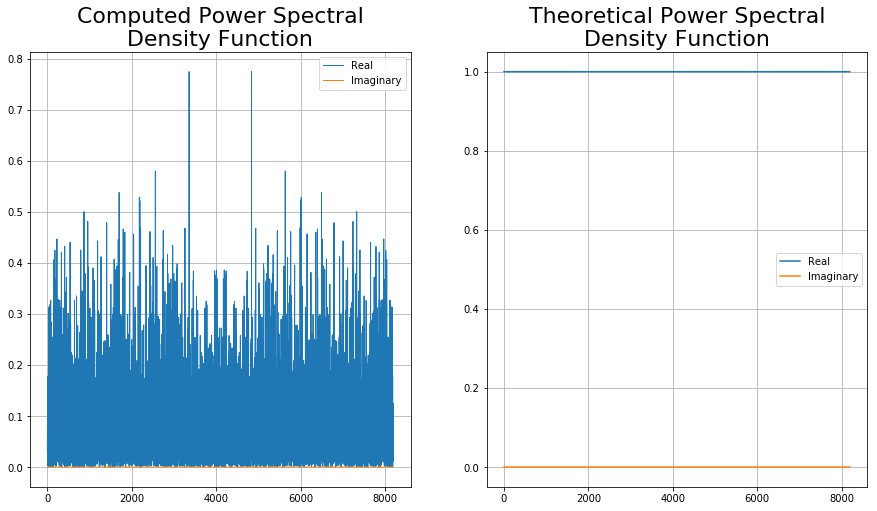

In [6]:
gaussian_signal = gaussian_white_noise(0, 0.1)
AC_g = auto_correlation(gaussian_signal)
S_g = PSD(AC=AC_u)
S_g_theo = PSD(AC=delta(0))

#****************Plotting****************
font_size=22

make_plot('Input Signal').plot(gaussian_signal)

# Auto-correlation function
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(AC_g, linewidth=1)
ax[0].set_title('Computed Auto-Correlation\nFunction', fontsize=font_size)
ax[0].grid('on')
ax[1].plot(delta(0), linewidth=1)
ax[1].set_title('Theoretical Auto-Correlation\nFunction', fontsize=font_size)
ax[1].grid('on')

# PSD
f,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(S_g.real, label="Real", linewidth=1)
ax[0].plot(S_g.imag, label="Imaginary", linewidth=1)
ax[0].set_title('Computed Power Spectral\nDensity Function', fontsize=font_size)
ax[0].grid('on')
ax[0].legend()
ax[1].plot(S_g_theo.real, label="Real")
ax[1].plot(S_g_theo.imag, label="Imaginary")
ax[1].set_title('Theoretical Power Spectral\nDensity Function', fontsize=font_size)
ax[1].grid('on')
ax[1].legend();

# Section 4.1

In [6]:
def rk4(x_prime, y_prime, z_prime):
    '''
    Implements a fourth order Runge-Kutta method of integration
    for three equations, *all without a time dependence*. This algorithm
    will not work if the equations have a time dependence (though can
    be modified to with little effort).
    
    References:
    - https://rosettacode.org/wiki/Runge-Kutta_method#using_lambda
    - https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods 
    - https://math.stackexchange.com/questions/721076/help-with-using-the-runge-kutta-4th-order-method-on-a-system-of-2-first-order-od
    - https://www.codeproject.com/Tips/792927/Fourth-Order-Runge-Kutta-Method-in-Python
    - https://www.youtube.com/watch?v=EXvLju3DLMY
    
    Params:
    
    '''
    return lambda x, y, z, h: (
            lambda k0, l0, j0: (
                lambda k1, l1, j1: (
                    lambda k2, l2, j2: (
                        lambda k3, l3, j3: (x + h*(k0 + 2*(k1 + k2) + k3)/6, 
                                            y + h*(l0 + 2*(l1 + l2) + l3)/6,
                                            z + h*(j0 + 2*(j1 + j2) + j3)/6)
                        )(x_prime(x+h*k2, y+h*l2, z+h*j2),
                          y_prime(x+h*k2, y+h*l2, z+h*j2),
                          z_prime(x+h*k2, y+h*l2, z+h*j2))
                    )(x_prime(x+h*k1/2, y+h*l1/2, z+h*j1/2),
                      y_prime(x+h*k1/2, y+h*l1/2, z+h*j1/2),
                      z_prime(x+h*k1/2, y+h*l1/2, z+h*j1/2))
                )(x_prime(x+h*k0/2, y+h*l0/2, z+h*j0/2),
                  y_prime(x+h*k0/2, y+h*l0/2, z+h*j0/2),
                  z_prime(x+h*k0/2, y+h*l0/2, z+h*j0/2))
            )(x_prime(x, y, z),
              y_prime(x, y, z),
              z_prime(x, y, z))

def funtion_derivatives(r, sigma=10, b=8/3):
    return (lambda x, y, z: sigma*(y - x),
            lambda x, y, z: r*x - y - x*z,
            lambda x, y, z: x*y - b*z    )

def lorenz_positions(x_0, y_0, z_0, r=28, max_time=40, dt=0.001, verbose=False):
    '''
    Function ot calculate the positions of a particle in a Lorenz
    system from time 0 to max_time using a specified time step. 
    Can also plot the particle's path throughout this time.
    '''
    x, y, z = [x_0], [y_0], [z_0]
    lorenz_system = rk4(*funtion_derivatives(r))

    for time in np.arange(0, max_time, dt):
        x_temp, y_temp, z_temp = lorenz_system(x[-1], y[-1], z[-1], dt)

        x.append(x_temp)
        y.append(y_temp)
        z.append(z_temp)
        
    if verbose:
        fig = plt.figure(figsize=(12,8))
        ax = fig.gca(projection='3d')
        ax.plot(np.array(x), np.array(y), np.array(z), linewidth=0.5)
        
        ax.set_title('Lorenz System\nStarting Condition: (' + str(x_0) + ", " + str(y_0) + ", " + str(z_0) + ")")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    
    return np.array([np.array(x), np.array(y), np.array(z)])

def lorenz_multipanel(plots, size, delta_r=False):
    '''
    Takes a specially formatted plot array (associated with the values of shape)
    and plots different Lorenz graphs in different panels with the proper labels.
    '''
    fig, ax = plt.subplots(*size, figsize=(6*size[1],6*size[0]), subplot_kw={'projection': '3d'})
    fig.tight_layout()
    
    for a1, p1 in zip(ax, plots):
        for a2, p2 in zip(a1, p1):
            a2.plot(*p2[1], linewidth=0.5)

            if not delta_r:
                a2.set_title('Starting Condition: (' + 
                        str(p2[0][0]) + ", " + str(p2[0][1]) + ", " + 
                        str(p2[0][2]) + ")")
            else:
                a2.set_title('R: ' + str(p2[0]))
            a2.set_xlabel('X')
            a2.set_ylabel('Y')
            a2.set_zlabel('Z')
        
    return

In [21]:
# This is just a very detailed Lorenz graph. Takes somewhere on the order of a minute to run
IWantToWaitAWhile = False
if IWantToWaitAWhile: lorenz_positions(5, 5, 5, r=24.8, max_time=10**4, dt=0.01, verbose=True);

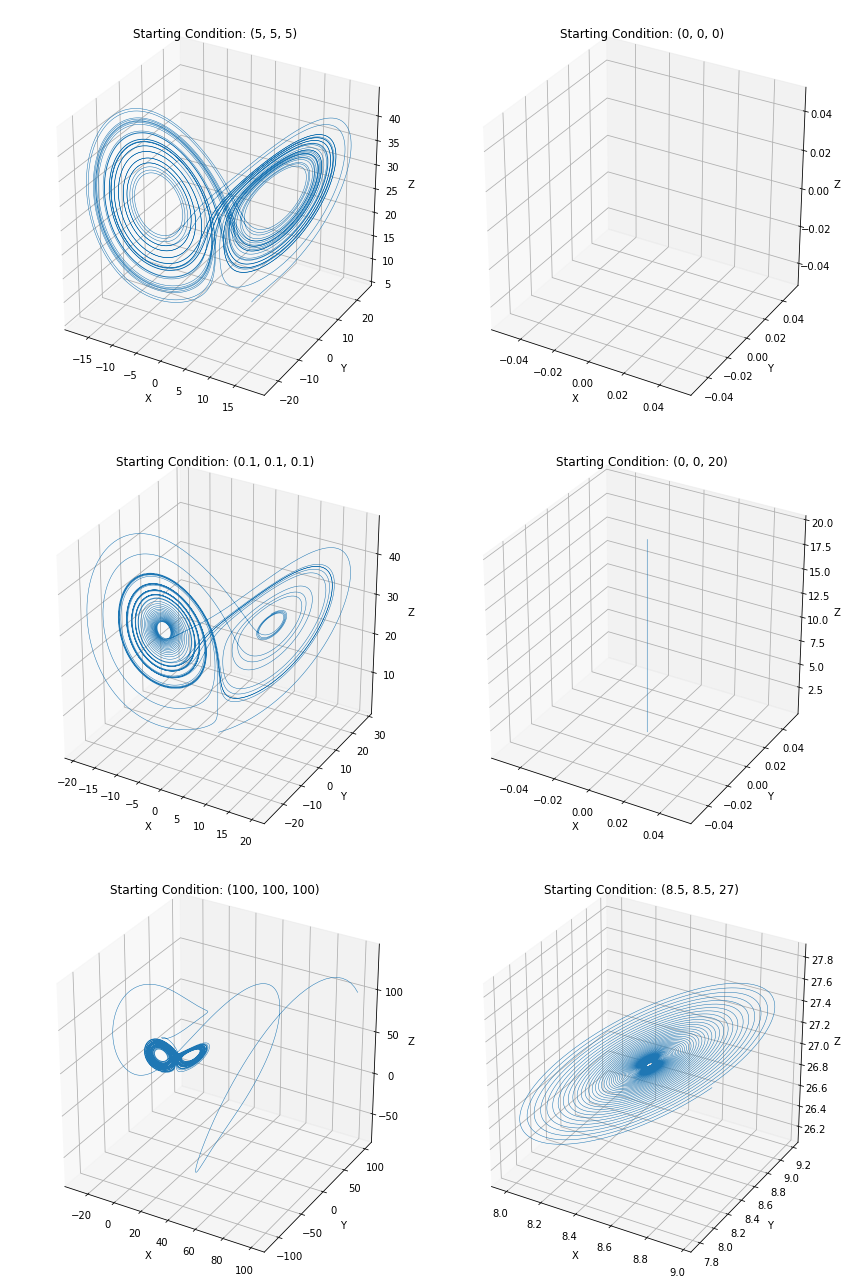

In [38]:
%matplotlib inline
plots = [(((5, 5, 5), lorenz_positions(5, 5, 5)), 
          ((0, 0, 0), lorenz_positions(0, 0, 0))), 
         (((0.1, 0.1, 0.1), lorenz_positions(0.1, 0.1, 0.1)), 
          ((0, 0, 20), lorenz_positions(0, 0, 20))), 
         (((100, 100, 100), lorenz_positions(100, 100, 100)), 
          ((8.5, 8.5, 27), lorenz_positions(8.5, 8.5, 27)))]
lorenz_multipanel(plots, (3,2))

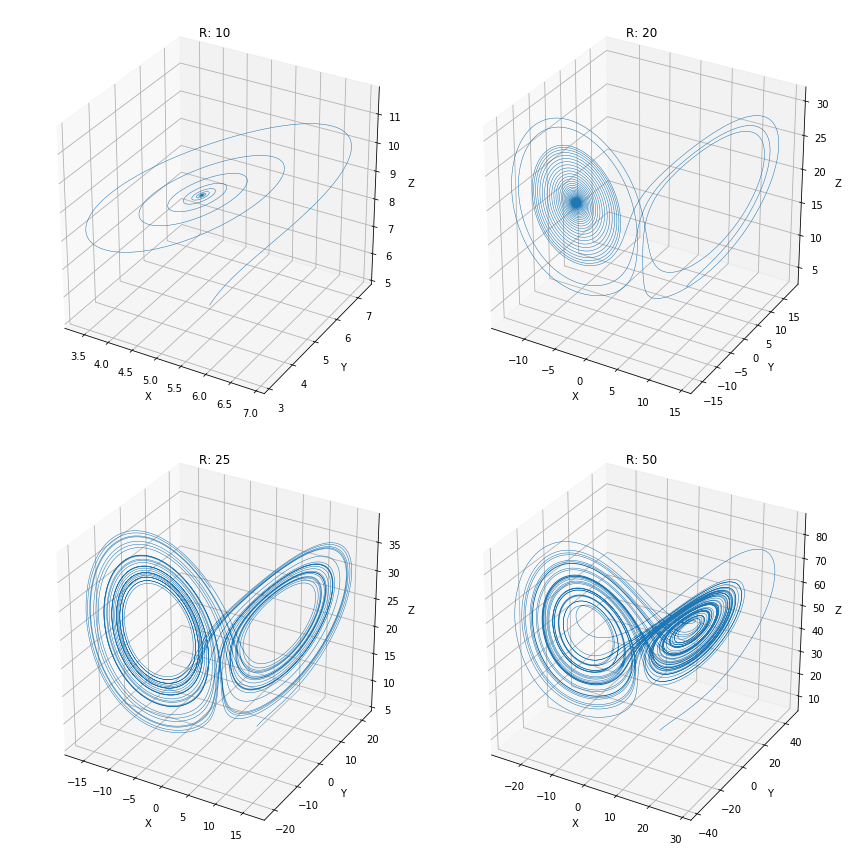

In [39]:
plots = [((10, lorenz_positions(5, 5, 5, r=10)), 
          (20, lorenz_positions(5, 5, 5, r=20))), 
         ((25, lorenz_positions(5, 5, 5, r=25)), 
          (50, lorenz_positions(5, 5, 5, r=50)))]
lorenz_multipanel(plots, (2, 2), delta_r=True)

In [3]:
%timeit lorenz_positions()

240 ms ± 7.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


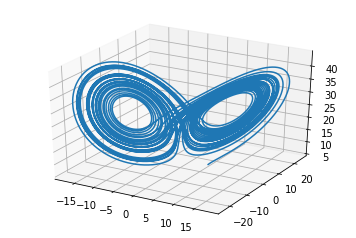

In [25]:
'''
THEORETICAL FROM WIKIPEDIA. DO NOT USE FOR ANALYSIS, EXCEPT FOR COMPARISON.
https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation

In general, odeint seems to be more accurate with less accumulated error.
'''
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [5, 5, 5]
t = np.arange(0.0, 40.0, 0.001)

states = odeint(f, state0, t)

#print("Mean error per point:", np.sum(abs(states[:, 0] - x[:-1]))*0.001/40 )

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

<IPython.core.display.Javascript object>


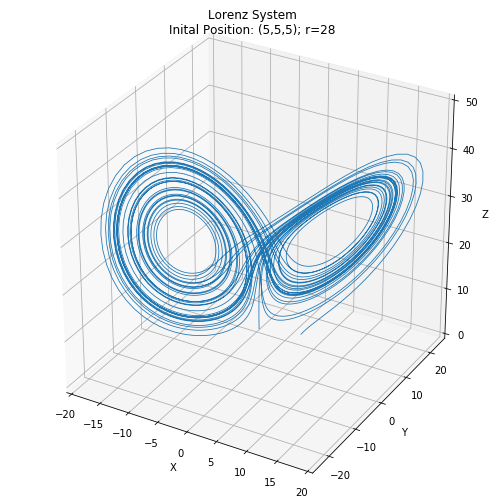

saving
saved


In [20]:
%matplotlib notebook
%matplotlib notebook

def update_lines(num, dataLines, lines):
    '''
    Function which updates the lines for an animation. Does not 
    generate or append stuff, just takes progressively larger
    chunks of a pregenerated list of nodes for an arbitrary number 
    of lines.
    '''
    #Source: https://matplotlib.org/examples/animation/simple_3danim.html
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

def generate_plot_object(data):
    '''
    A function to generate the lines for a plot to be animated, initialised with the first
    nodes in the data array.
    '''
    #Source: https://matplotlib.org/examples/animation/simple_3danim.html
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    fig.set_size_inches(7, 7)

    # NOTE: Can't pass empty arrays into 3d version of plot()
    lines = [ax.plot(dat[0, :1], dat[1, :1], dat[2, :1], linewidth=0.8)[0] for dat in data]

    # Setting the axes properties
    ax.set_xlim3d([-20, 20])
    ax.set_xlabel('X')

    ax.set_ylim3d([-25, 25])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0.0, 50.0])
    ax.set_zlabel('Z')

    ax.set_title('Lorenz System\nInital Position: (5,5,5); r=28')
    return fig, lines

max_time = 40
nframes = 4000
data = np.array([lorenz_positions(5, 5, 5, max_time=max_time, dt=max_time/nframes)])

fig, lines = generate_plot_object(data)

line_ani = animation.FuncAnimation(fig, update_lines, nframes, fargs=(data, lines),
                                   interval=10, blit=True);

# For a mac (sorta, need to be modified a little bit):
# Uncomment these lines to save the animation. 
# Please make sure that you download ffmpeg and then set the pointer to the correct location for your system
#plt.rcParams['animation.ffmpeg_path'] = '/home/nathan.meulenbroek/miniconda3/bin'
#line_ani.save('lorentz_system.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# For windows machine:
saving = False
if saving:
    plt.rcParams['animation.ffmpeg_path'] = 'D:\\Downloads\\ffmpeg-20180227-fa0c9d6-win64-static\\ffmpeg-20180227-fa0c9d6-win64-static\\bin\\ffmpeg.exe'
    FFwriter = animation.FFMpegWriter(fps=60)
    print("Saving")
    line_ani.save('lorentz_system.mp4', writer=FFwriter, dpi=100)
    print("Saved")

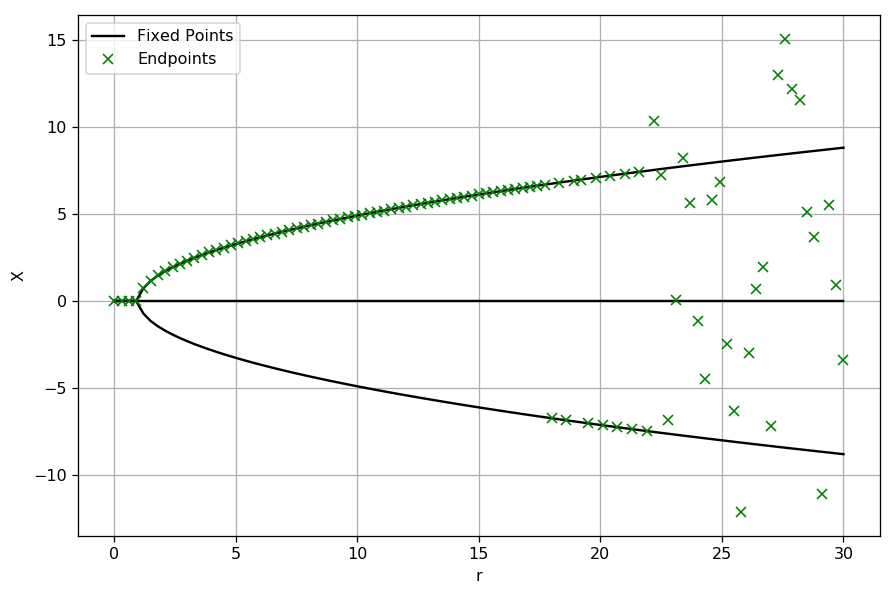

In [145]:
%matplotlib inline
def fixed_point(r, multiplyer=1, b=8/3):
    x = multiplyer*np.sqrt(b*(r-1))
    y = x
    z = r-1
    return x, y, z

r = np.linspace(0, 30, 101, dtype=np.complex)

endpoint = []

verbose = False
for i in r:
    if verbose: print("Starting r =", i.real, end=' ')
    endpoint.append(lorenz_positions(5, 5, 5, r=i.real, max_time=100, dt=0.01)[0, -1])
    if verbose: print("Finished")

y = fixed_point(r)[0]
plot = make_plot(x_label='r', y_label='X')
plot.plot(r.real, y.real, 'k-')
plot.plot(r.real, -y.real, 'k-', label="Fixed Points")
plot.plot(r.real, np.zeros(r.size), 'k-')
plot.plot(r.real, endpoint, 'gx', label='Endpoints')
plot.legend();

## 4.1.1 The Fourier analysis

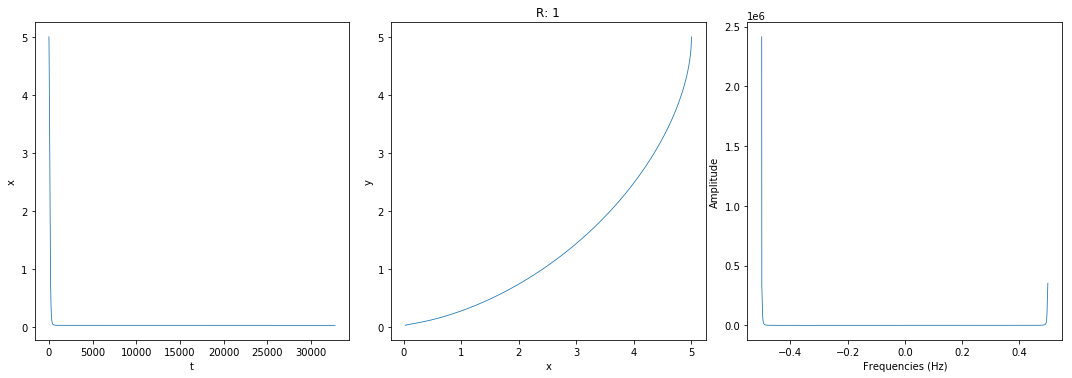

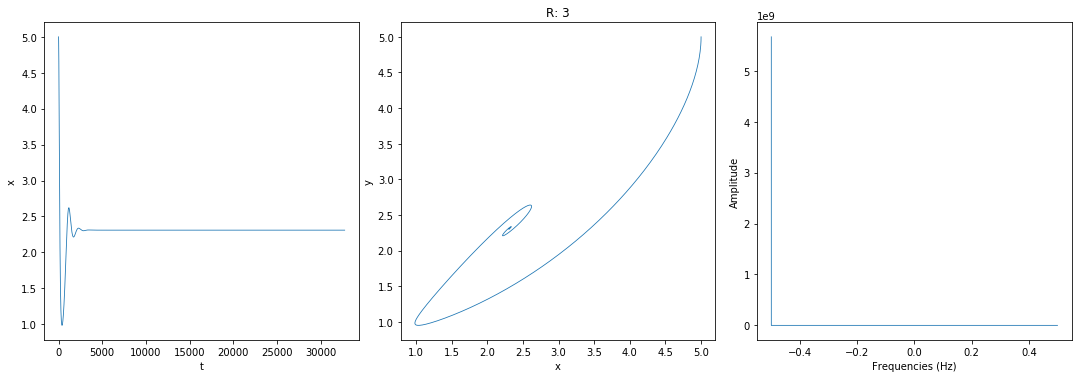

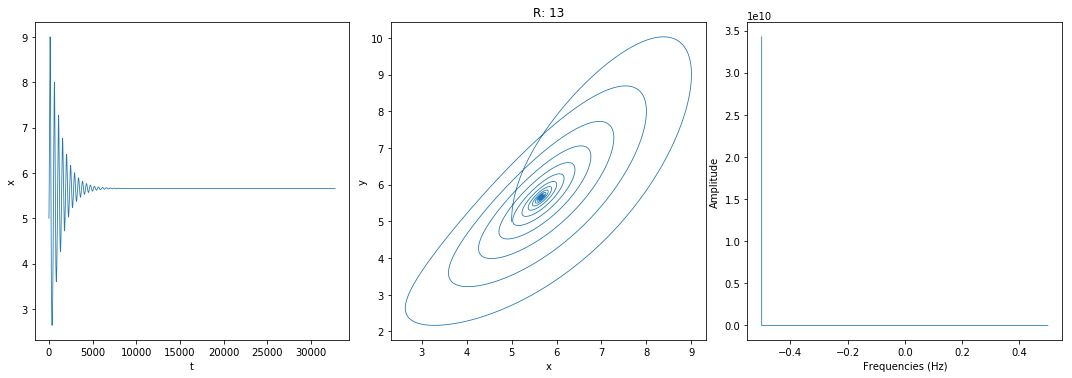

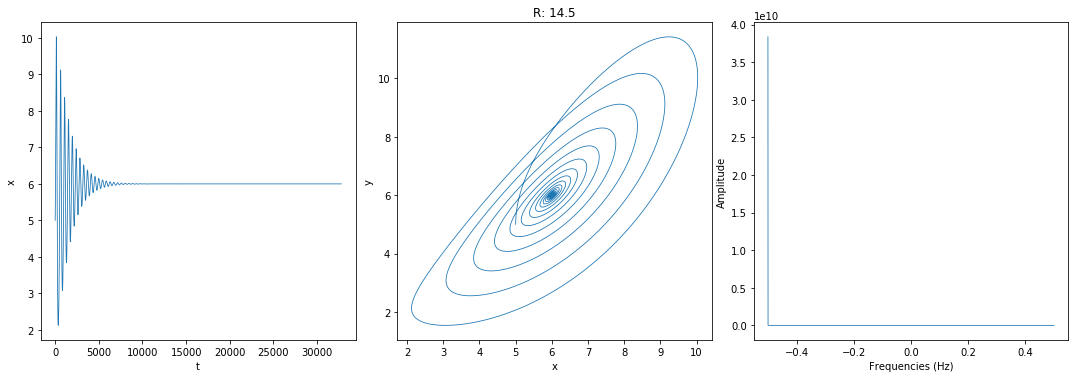

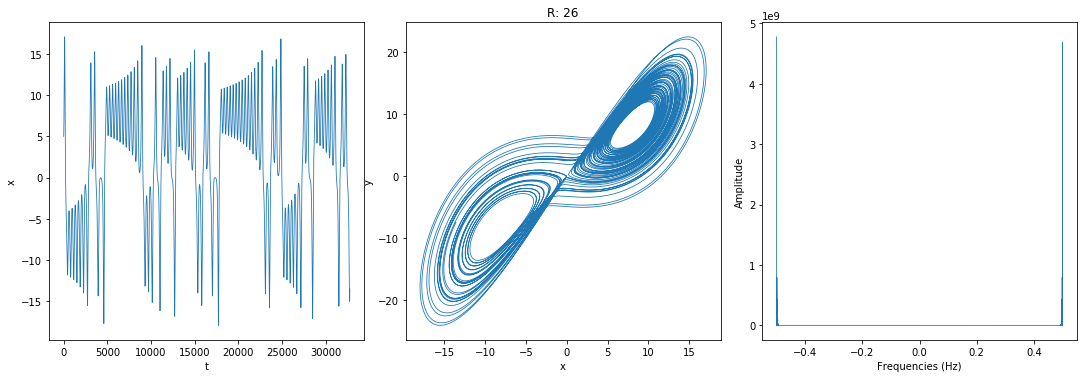

In [155]:
%matplotlib inline

for r in [1, 3, 13, 14.5, 26]:
    x, y, z = lorenz_positions(5, 5, 5, r=r, max_time=64, dt=64/2**15)
    
    #*********Plotting*********
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.tight_layout()
    
    ax[0].plot(x, linewidth=0.8)
    ax[1].plot(x, y, linewidth=0.8)
    ax[2].plot(np.fft.fftshift(np.fft.fftfreq(len(x))), np.abs(np.fft.fft(x))**2, linewidth=0.8)
    
    ax[1].set_title('R: ' + str(r))
    
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x')
    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
        
    ax[2].set_xlabel('Frequencies (Hz)')
    ax[2].set_ylabel('Amplitude')
    ax[2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

In [148]:
%matplotlib inline

rs = np.linspace(0, 30, 31)
spectral_densities = []

for r in rs:
    x, y, z = lorenz_positions(5, 5, 5, r=r, max_time=40, dt=0.01)

    spectral_densities.append(np.abs(np.fft.fft(x, norm='ortho'))**2)
    
xx, yy = np.meshgrid(np.fft.fftshift(np.fft.fftfreq(len(x))), rs)

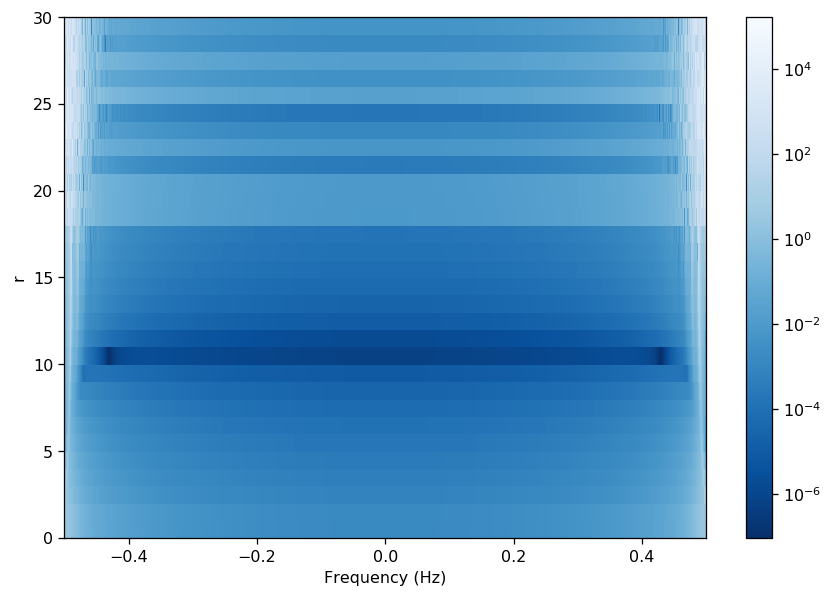

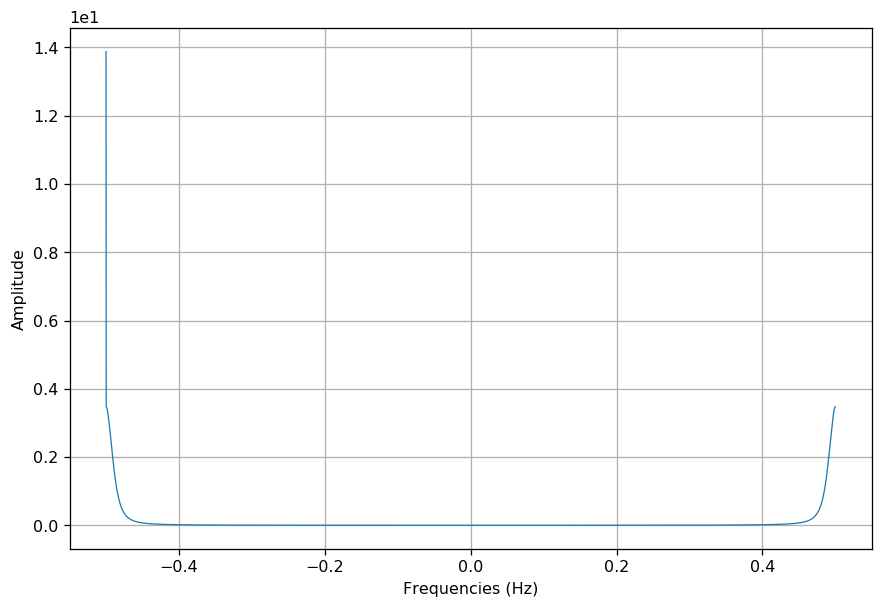

In [151]:
spectral_densities = np.array(spectral_densities)

make_plot(y_label='r', x_label='Frequency (Hz)', grid=False)
plt.pcolormesh(xx, yy, spectral_densities, 
               norm=colors.LogNorm(vmin=spectral_densities.min(), vmax=spectral_densities.max()))
plt.set_cmap('Blues_r')
plt.colorbar()
plt.show()

make_plot(x_label="Frequency (Hz)", y_label="Amplitude").plot(np.fft.fftshift(np.fft.fftfreq(len(spectral_densities[1]))), 
                                                              spectral_densities[1], linewidth=0.8)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));